# Index

This notebook explores communities of Friendster users using NetworkX:

1. Read friends file and save graph as gpickle
2. Select 10 random users to be centers of communities
3. Visualize 10 centers
4. Create communities
5. Compute average distance between two users in a community
6. Closeness centrality
7. Betweeness centrality
8. Degree centrality
9. Eigenvector centrality
10. Find largest connected component
11. Find center, radius, and diameter of largest connected component -- did not finish
12. Recommend friends

In [94]:
import matplotlib.pyplot as plt
import random
import networkx as nx
import numpy as np
import time

## 1. Read friends file and save graph as gpickle

In [ ]:
with open('../data/friends-000______.txt') as f, open("../data/output.txt", "w") as w:
    for row in f:
        if 'private' not in row and 'notfound' not in row and ' ' not in row:
            row = row.replace(",", " ")
            row = row.replace(":", " ")
            w.write(row)
            
w.close()

In [ ]:
G = nx.read_adjlist('../data/output.txt')

In [ ]:
# save graph as a graph pickle
nx.write_gpickle(G, '000graph.pickle')

In [2]:
# read graph as a graph pickle
%time G = nx.read_gpickle('000graph.pickle')

Wall time: 46.6 s


In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3051181
Number of edges: 10724270
Average degree:   7.0296


In [4]:
users = list(G)

## 2. Select 10 random users to be centers of communities

In [5]:
random.seed(42)

In [6]:
def select_random_k(lst, k):
    """
    Select k random values from a list.
    """
    random_k = []
    if lst != []:
        while k > 0:
            index = random.randint(0, len(lst) - 1)
            elem = lst[index]
            if elem not in random_k and elem:
                random_k.append(elem)
                k -= 1
    return random_k

In [7]:
%time select_random_k(users, 10)

Wall time: 0 ns


['22970410',
 '193858',
 '4504293',
 '8086849',
 '14447971',
 '408851',
 '1214838',
 '1082995',
 '11044617',
 '641892']

In [8]:
# for comparison:
%time np.random.choice(users, 10)

Wall time: 556 ms


array(['3177520', '2268686', '1522272', '21917888', '16137475', '257037',
       '20433948', '34560866', '739483', '128967'], dtype='<U9')

In [9]:
centers = select_random_k(users, 10)

## 3. Visualize 10 centers

In [10]:
def visualize_centers(G, centers):
    """
    Given a network and a list of centers, print information about center
    and visualize all centers on one graph.
    """
    for center in centers:
        print('User:', center, '\nNeighbors:', set(G.neighbors(center)), '\n')
        plt.figure(3,figsize=(10,10)) 
        nx.draw(G.subgraph(G.neighbors(center)), with_labels = True)

User: 25521267 
Neighbors: {'397515', '484914', '404873', '69111', '364458', '852277', '514919', '760924', '590962', '451532', '120403', '438402'} 

User: 83119436 
Neighbors: {'726077'} 

User: 2186453 
Neighbors: {'441432'} 

User: 1970232 
Neighbors: {'937513', '939729', '855324', '541897', '195295', '21483'} 

User: 23371 
Neighbors: {'22994', '21600', '19863', '44062', '21320', '9624669', '1194280', '5572113', '7609511', '19816', '21246', '1998585', '23476'} 

User: 1898062 
Neighbors: {'196979', '77513', '944556'} 

User: 16532976 
Neighbors: {'210395'} 

User: 1000756 
Neighbors: {'311544', '718217', '223728', '513221', '556810'} 

User: 56022809 
Neighbors: {'572324'} 

User: 4336017 
Neighbors: {'751555'} 



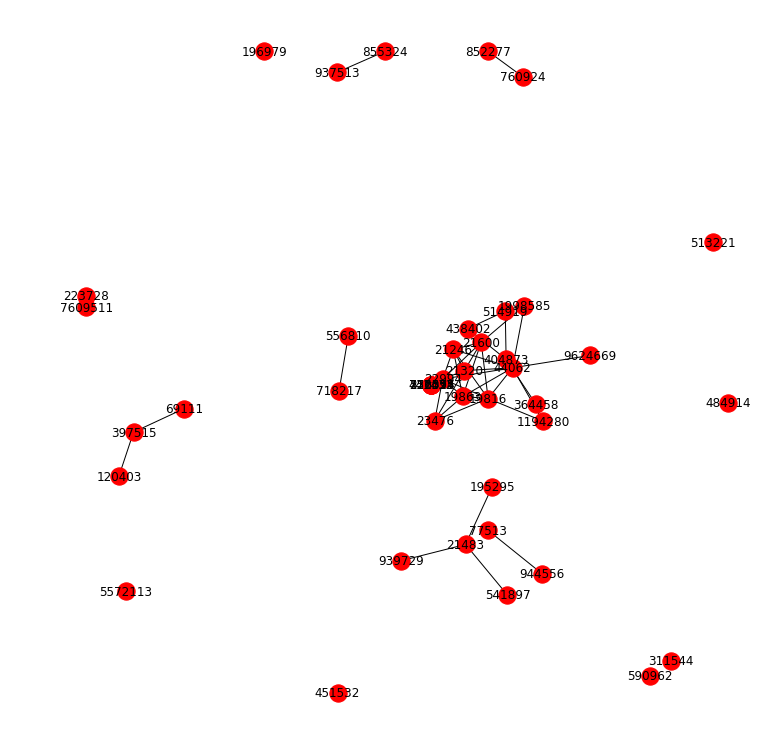

In [11]:
visualize_centers(G, centers)

## 4. Create communities

In [12]:
def create_community(G, center):
    """
    A community consists of closest 50 nodes to a center.
    """
    community_dict = nx.single_source_shortest_path_length(G, center, cutoff=3)
    return list(community_dict.keys())[:50]

In [13]:
communities_dict = {}
for center in centers:
    communities_dict[center] = create_community(G, center)

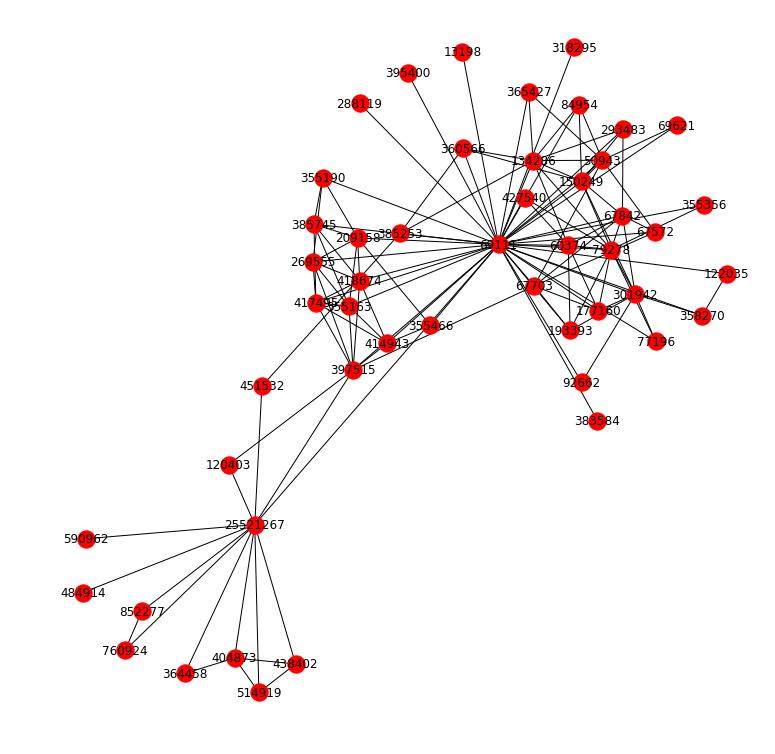

In [38]:
# visualize one community
plt.figure(3,figsize=(10,10)) 
nx.draw(G.subgraph(communities_dict['25521267']), with_labels = True)

In [63]:
comparison_community = create_community(G, '202')

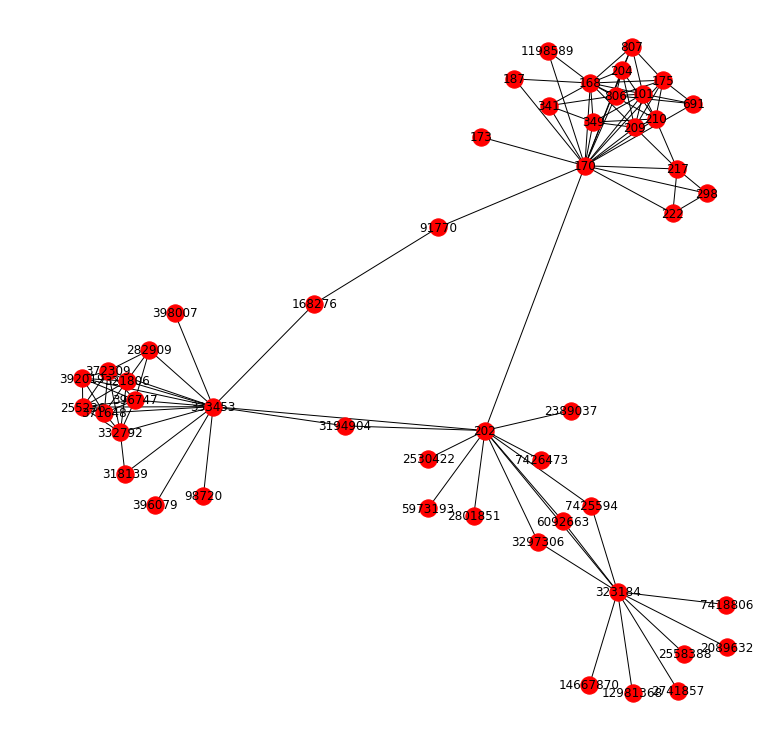

In [85]:
# visualize comparison community
plt.figure(3,figsize=(10,10)) 
nx.draw(G.subgraph(comparison_community), with_labels = True)

## 5. Compute average distance between two users in a community

In [22]:
def average_distance(G, community, user):
    degrees = nx.average_neighbor_degree(G, nodes=community)
    average_degree = round(float(sum(degrees.values())) / len(degrees), 2)
    print('Center:', user, '\nAverage distance:', average_degree, '\n')
    return average_degree

In [23]:
average_distances_dict = {}
for key in communities_dict.keys():
    average_distances_dict[key] = average_distance(G, communities_dict[key], key)

print('Average "average distance" of all communities:', 
      round(float(sum(average_distances_dict.values())) / len(average_distances_dict), 2))

Center: 25521267 
Average distance: 64.55 

Center: 83119436 
Average distance: 328.38 

Center: 2186453 
Average distance: 73.65 

Center: 1970232 
Average distance: 51.59 

Center: 23371 
Average distance: 30.11 

Center: 1898062 
Average distance: 51.11 

Center: 16532976 
Average distance: 177.71 

Center: 1000756 
Average distance: 38.02 

Center: 56022809 
Average distance: 125.64 

Center: 4336017 
Average distance: 50.03 

Average "average distance" of all communities: 99.08


## 6. Closeness centrality

In [62]:
def closeness_centrality(G):
    nodes = G.nodes()
    closeness_centrality = []
    num_nodes = len(G)
    for n in nodes:
        paths_sum = sum((nx.single_source_shortest_path_length(G, n)).values())
        closeness_centrality.append((n, round(((num_nodes - 1) / paths_sum), 3)))
    return sorted(closeness_centrality, key=lambda x:x[1], reverse=True)[0]

In [64]:
closeness_centrality(G.subgraph(comparison_community))

('202', 0.57)

## 7. Betweeness centrality

In [65]:
def single_source_shortest_path(G, s):
    """
    Borrowed from https://github.com/networkx/networkx/blob/master/networkx/algorithms/centrality/betweenness.py
    """
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)
    D = {}
    sigma[s] = 1.0
    D[s] = 0
    Q = [s]
    while Q:
        v = Q.pop(0)
        S.append(v)
        sigmav = sigma[v]
        for w in G[v]:
            if w not in D:
                Q.append(w)
                D[w] = D[v] + 1
            if D[w] == D[v] + 1:
                sigma[w] += sigmav
                P[w].append(v)
    return S, P, sigma

In [66]:
def accumulate_basic(betweenness_dict, S, P, sigma, s):
    """
    Adapted from https://github.com/networkx/networkx/blob/master/networkx/algorithms/centrality/betweenness.py
    """
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1.0 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness_dict[w] += delta[w]
    return betweenness_dict

In [67]:
def betweenness_centrality(G):
    """
    Adapted from https://github.com/networkx/networkx/blob/master/networkx/algorithms/centrality/betweenness.py
    """
    betweenness_dict = dict.fromkeys(G, 0.0) 
    nodes = G
    for s in nodes:
        S, P, sigma = single_source_shortest_path(G, s)
        betweenness_dict = accumulate_basic(betweenness_dict, S, P, sigma, s)
        betweenness_dict = {k:round(v, 3) for k, v in betweenness_dict.items()}
    top = max(betweenness_dict, key=betweenness_dict.get)
    return top, betweenness_dict[top]

In [68]:
betweenness_centrality(G.subgraph(comparison_community))

('202', 1648.0)

## 8. Degree centrality

In [69]:
def compute_degree_centrality(G):
    centrality_dict = {}
    normalize = 1/(len(G) - 1)
    for n, d in G.degree():
        centrality_dict[n] = round(d*normalize, 3)
    top = max(centrality_dict, key=centrality_dict.get)
    return top, centrality_dict[top]

In [70]:
compute_degree_centrality(G.subgraph(comparison_community))

('170', 0.388)

## 9. Eigenvector Centrality

In [76]:
def eigenvector_centrality(G):
    eigenvector_dict = nx.eigenvector_centrality(G)
    top = max(eigenvector_dict, key=eigenvector_dict.get)
    return top, round(eigenvector_dict[top], 3)

In [77]:
eigenvector_centrality(G.subgraph(comparison_community))

('170', 0.446)

## 10. Find largest connected component

In [ ]:
largest_connected_component = max(nx.connected_component_subgraphs(G), key=len)

In [ ]:
# save graph as a graph pickle
nx.write_gpickle(largest_connected_component, '000largest_connected_graph.pickle')

In [ ]:
# read graph as a graph pickle
%time largest_connected_graph = nx.read_gpickle('000largest_connected_graph.pickle')

## 11. Find center, radius, and diameter of largest connected component

This section ran for over 12 hours and did not finish running. 

Since we were not able to find the radius of the largest connected component using MapReduce, we decided not to finish this.

In [ ]:
# center of largest connected graph
nx.center(largest_connected_graph)

# minimum eccentricity of any node in the largest connected graph
nx.radius(largest_connected_graph)

# maximum eccentricity of any node in the largest connected graph
nx.diameter(largest_connected_graph)

## 12. Recommend friends

In [78]:
def friends_of_friends_set(G, user):
    """
    Given a user, find friends of friends who are not friends with the user.
    Inputs:
        G: network
        user: node
    Returns: potential_friends
    """
    friends = set(G.neighbors(user))
    potential_friends = set()
    for f in friends:
        for fof in G.neighbors(f):
            if not G.has_edge(user, fof) and fof != user:
                potential_friends.add(fof)            
    return friends, potential_friends

In [79]:
def compute_degree(G, friends, f):
    """
    Compute how close a potential friend is by how many friends they share.
    """
    num_friends = len(friends)
    fs_friends = list(G.neighbors(f))
    friends_in_common = list(set(friends).intersection(fs_friends))
    degree = len(friends_in_common)/(len(friends)+len(fs_friends))
    return degree

In [80]:
def top_k_recs(G, friends, potential_friends, k=10):   
    """
    Get top 10 closest potential friends.
    """
    degree_dict = {}
    for f in potential_friends:
        deg = compute_degree(G, friends, f)
        degree_dict[f] = deg

    sorted_list = sorted(degree_dict, key=degree_dict.get, reverse=True)
    return sorted_list[:k]

In [81]:
def friends_recommender(G, user, k):
    friends, potential_friends = friends_of_friends_set(G, user)
    recs = top_k_recs(G, friends, potential_friends, k)
    return recs

In [102]:
l = communities_dict.values()
users = [item for sublist in l for item in sublist]
recs_dict = {}
k = 10

start = time.time()
for user in users:
    recs = friends_recommender(G, user, k)
    recs_dict[user] = recs
end = time.time()
total = end - start
print('Total runtime:', total)
print('Average runtime:', total/len(users))

Total runtime: 15.469588279724121
Average runtime: 0.030939176559448243


In [87]:
user = '25521267'
print('Top {} friend recommendations for user {}:'.format(k, user), *recs_dict[user])

Top 10 friend recommendations for user 25521267: 2007585 1054291 786680 23265222 1409035 561988 1632562 490426 657254 644829


In [89]:
%time friends_recommender(G, '202', 5)

Wall time: 976 µs


['282784', '16835044', '14091708', '19229471', '19395782']